In [180]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

print(__version__) # requires version >= 1.9.0
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

5.7.0


In [181]:
df=pd.read_csv("weather_data.csv")

In [182]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [184]:
list(df.loc[:, df.dtypes == object].columns)

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

## Data Cleaning 

In [185]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),5999.0,10.217695,10.565425,-14.088889,1.094444,10.0500,18.722222,34.005556
Apparent Temperature (C),5999.0,8.958658,11.923712,-22.094444,-1.538889,10.0500,18.722222,36.400000
Humidity,5999.0,0.779488,0.173051,0.270000,0.680000,0.8300,0.920000,1.000000
Wind Speed (km/h),5999.0,10.007362,6.536619,0.000000,4.878300,9.0643,13.395200,45.933300
Wind Bearing (degrees),5999.0,190.349558,107.026792,0.000000,122.000000,190.0000,287.000000,359.000000
Visibility (km),5999.0,9.476875,4.038583,0.000000,6.906900,9.9820,11.270000,16.100000
Loud Cover,5999.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),5999.0,997.359828,145.173638,0.000000,1012.060000,1016.8400,1022.490000,1045.140000


In [186]:
## Dropping object columns and some int columns not using our model
cols = ['Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)','Loud Cover']
df = df.drop(cols,axis=1)

In [187]:
## Converting Formatted Date  object to Datatime
df['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            5999 non-null   datetime64[ns, UTC]
 1   Temperature (C)           5999 non-null   float64            
 2   Apparent Temperature (C)  5999 non-null   float64            
 3   Humidity                  5999 non-null   float64            
 4   Wind Speed (km/h)         5999 non-null   float64            
 5   Pressure (millibars)      5999 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 281.3 KB


In [188]:
## making datee to index
df1=df.sort_values(by=['Formatted Date'])


In [189]:
df1=df1.set_index('Formatted Date')

In [190]:
df1.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 23:00:00+00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98


In [191]:
df1.index.duplicated().sum()

0

In [192]:
#removing duplicate values in the index
df1.index.drop_duplicates(keep='first')

DatetimeIndex(['2005-12-31 23:00:00+00:00', '2006-01-01 00:00:00+00:00',
               '2006-01-01 01:00:00+00:00', '2006-01-01 02:00:00+00:00',
               '2006-01-01 03:00:00+00:00', '2006-01-01 04:00:00+00:00',
               '2006-01-01 05:00:00+00:00', '2006-01-01 06:00:00+00:00',
               '2006-01-01 07:00:00+00:00', '2006-01-01 08:00:00+00:00',
               ...
               '2006-12-31 13:00:00+00:00', '2006-12-31 14:00:00+00:00',
               '2006-12-31 15:00:00+00:00', '2006-12-31 16:00:00+00:00',
               '2006-12-31 17:00:00+00:00', '2006-12-31 18:00:00+00:00',
               '2006-12-31 19:00:00+00:00', '2006-12-31 20:00:00+00:00',
               '2006-12-31 21:00:00+00:00', '2006-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=5999, freq=None)

In [193]:
# data after cleaning
df1.dropna()
df1.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 23:00:00+00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98


## EXPLORATORY DATA ANALYSIS

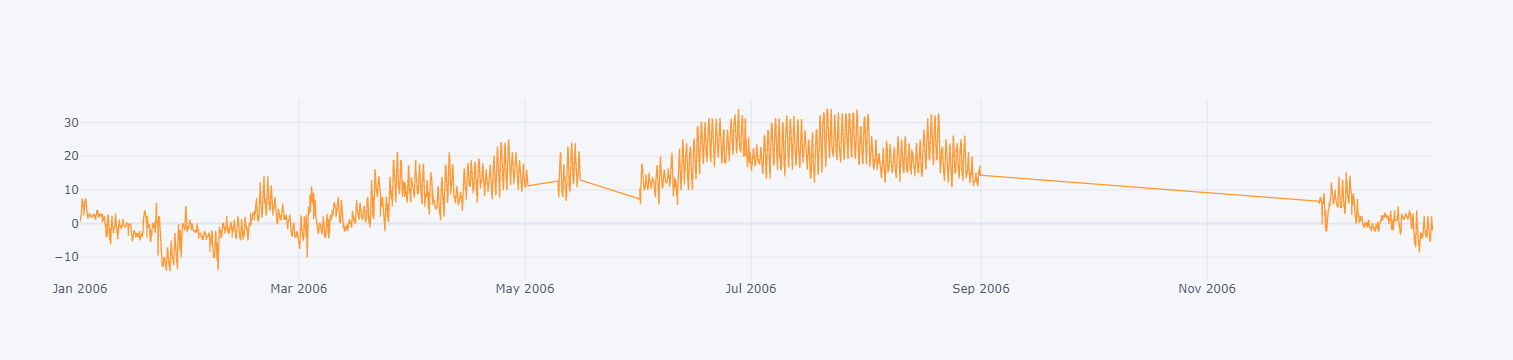

In [194]:
df1.iplot(y='Temperature (C)');

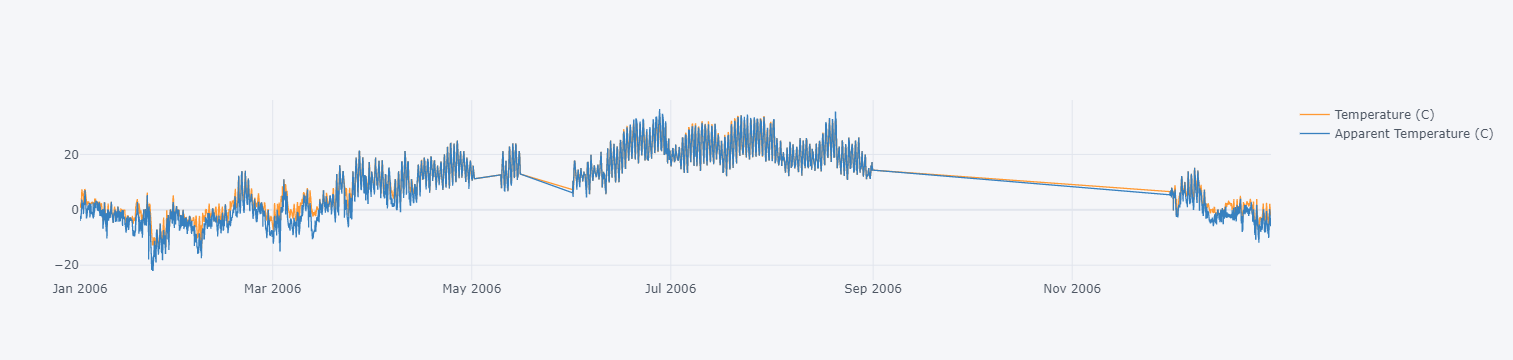

In [195]:
df1.iplot(y=['Temperature (C)','Apparent Temperature (C)']);

In [196]:
#resampling the data into day format
df1.index = pd.to_datetime(df1.index,utc=True)
df2 = df1.resample(rule='D').mean()
df2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,1016.660000
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833


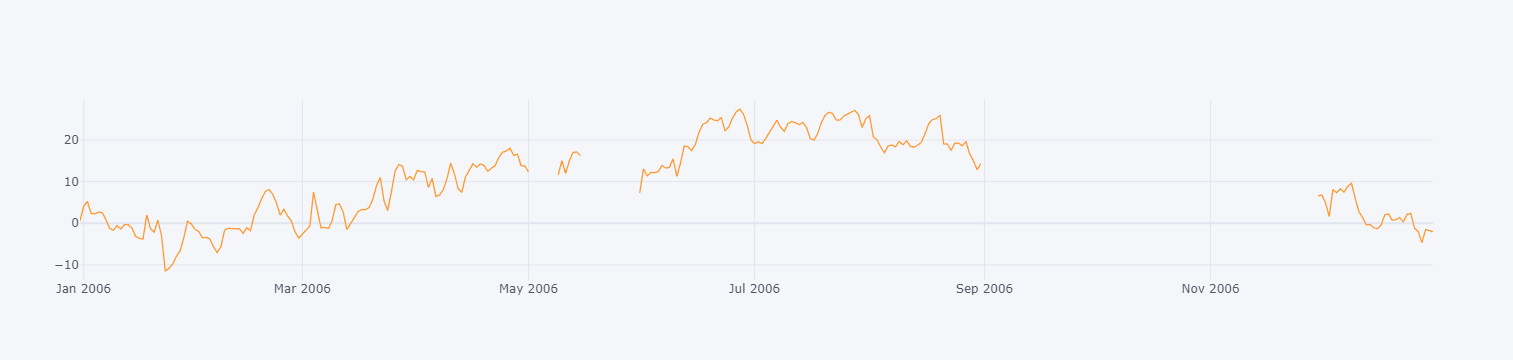

In [197]:
df2.iplot(y='Temperature (C)');

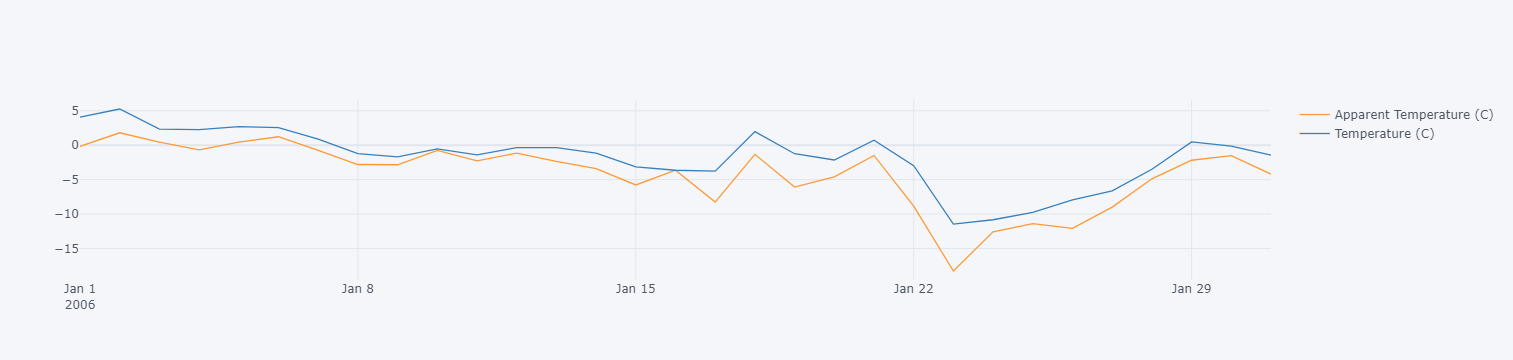

In [198]:
jan2006 = df2['2006-01-01':'2006-01-31']
jan2006.iplot(y=['Apparent Temperature (C)','Temperature (C)'])

In [199]:
#resampling
jan=jan2006.resample(rule='D').mean()
jan.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833
2006-01-05 00:00:00+00:00,2.703935,0.445833,0.951250,8.991179,935.873750


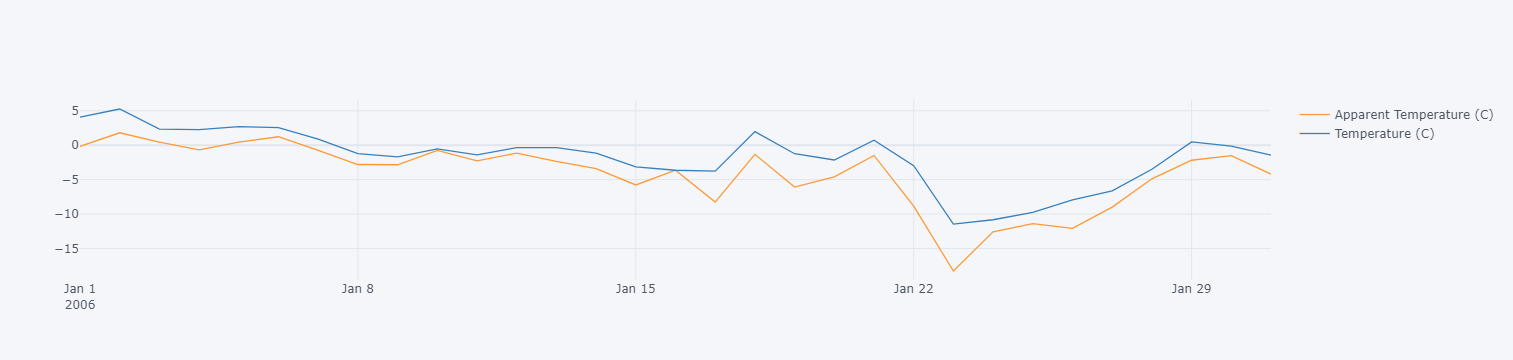

In [200]:
jan.iplot(y=['Apparent Temperature (C)','Temperature (C)'])

In [201]:
winter = df2['2006-01-01':'2006-02-28']
winter2 = df2['2006-12-01':'2006-12-31']
spring = df2['2006-03-01':'2006-05-31']
summer = df2['2006-06-01':'2006-08-31']
autom = df2['2006-09-01':'2006-11-30']

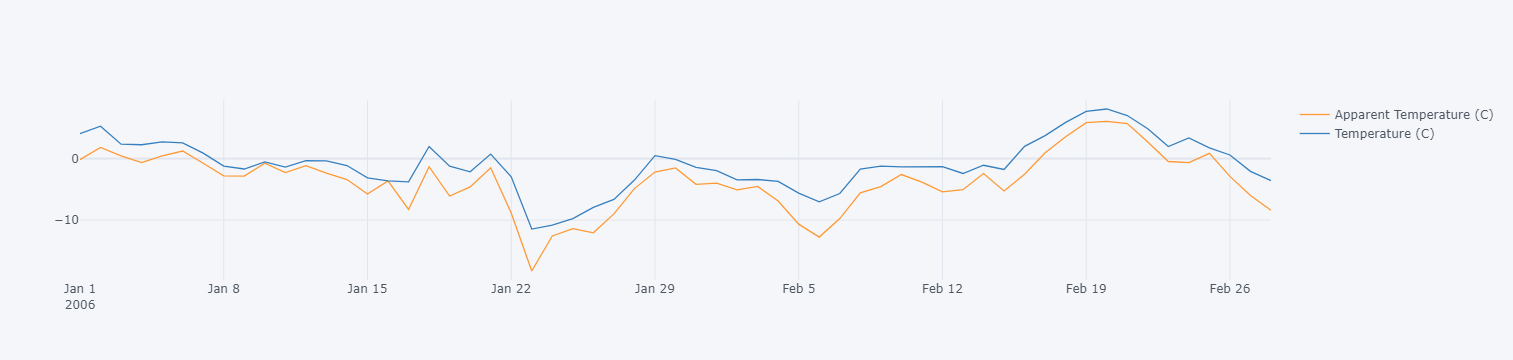

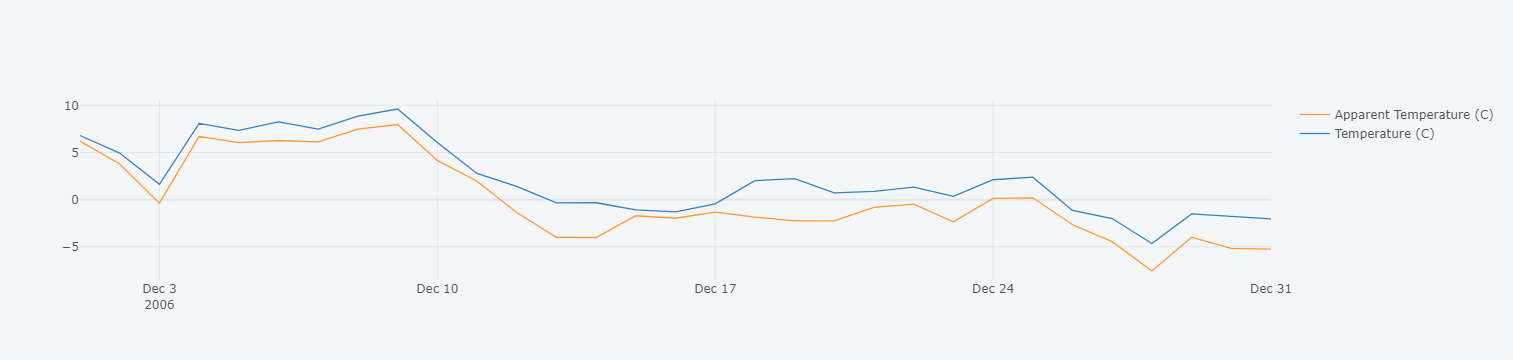

In [202]:
winter.iplot(y=['Apparent Temperature (C)','Temperature (C)'])
winter2.iplot(y=['Apparent Temperature (C)','Temperature (C)'])

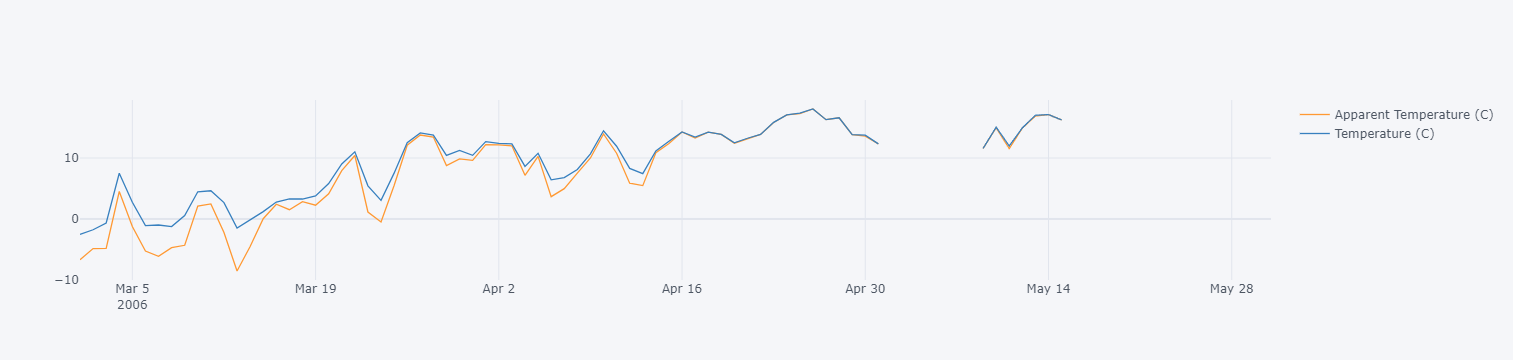

In [203]:
spring.iplot(y=['Apparent Temperature (C)','Temperature (C)'])

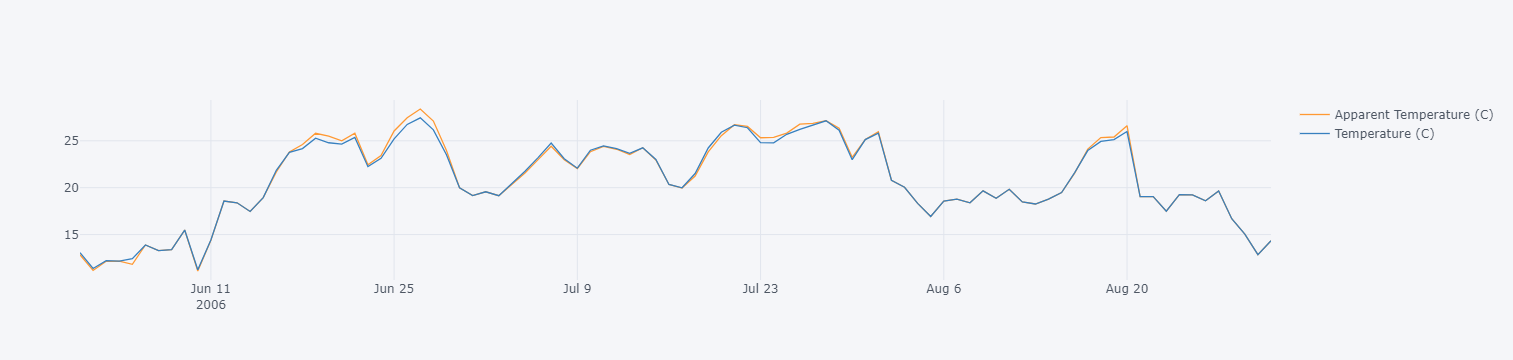

In [204]:
summer.iplot(y=['Apparent Temperature (C)','Temperature (C)'])

In [205]:
## Checking correlation
df2.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,0.996030,-0.574989,-0.181508,-0.150195
Apparent Temperature (C),0.996030,1.000000,-0.561001,-0.236953,-0.145961
Humidity,-0.574989,-0.561001,1.000000,-0.024345,0.117712
Wind Speed (km/h),-0.181508,-0.236953,-0.024345,1.000000,-0.074545
Pressure (millibars),-0.150195,-0.145961,0.117712,-0.074545,1.000000


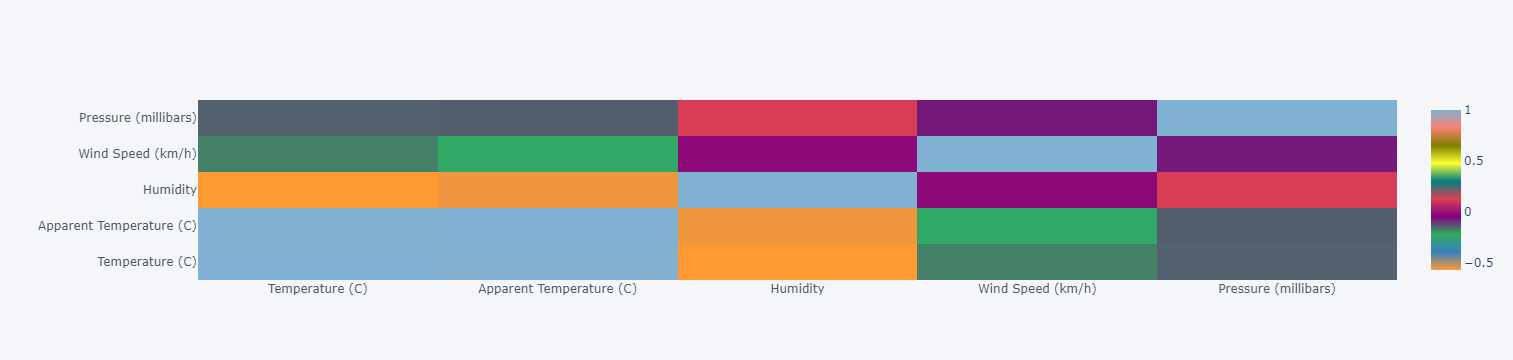

In [206]:
df2.corr().iplot(kind='heatmap')

## Data Visulation

In [207]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

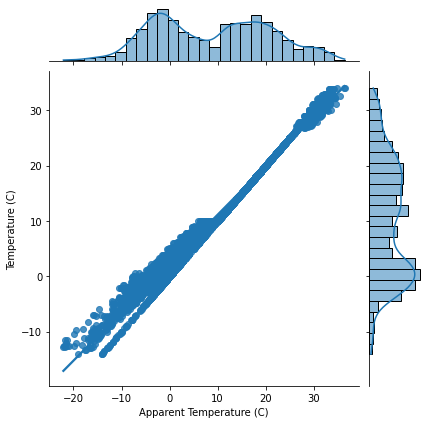

In [208]:
sns.jointplot('Apparent Temperature (C)','Temperature (C)', kind='reg', data=df1);

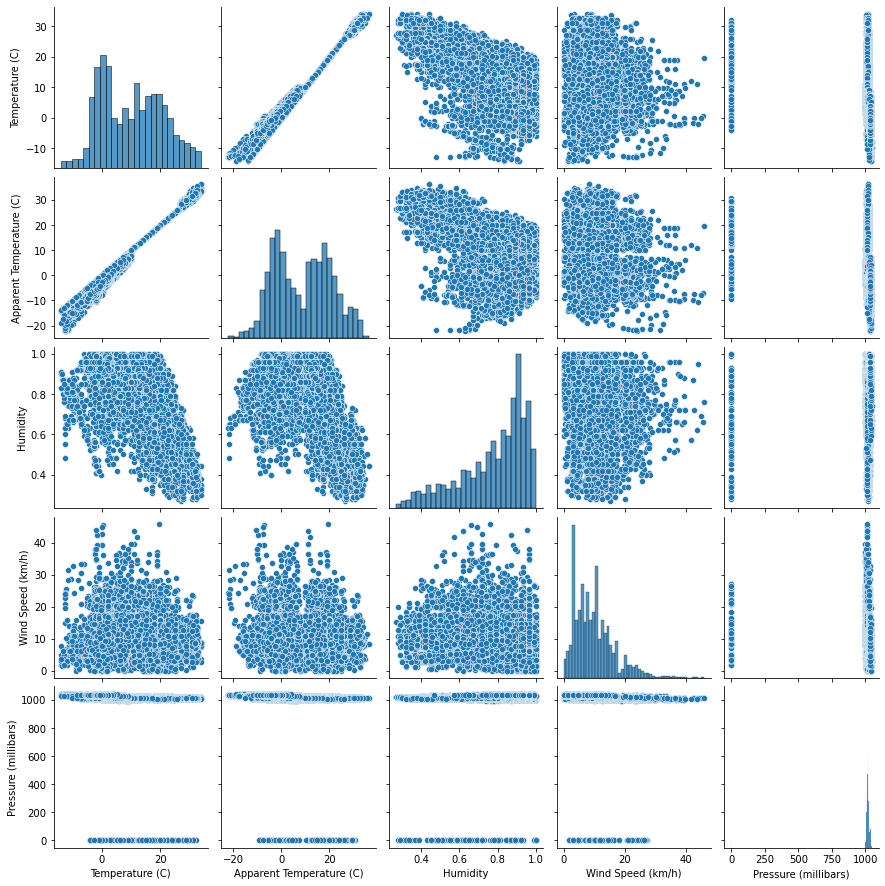

In [209]:
sns.pairplot(data=df1);

## Train test split %70 train and %30 test

In [210]:
X = df1['2006-01-01':'2006-07-20']
X

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00+00:00,1.205556,-3.072222,0.85,15.9068,1014.08
...,...,...,...,...,...
2006-07-20 19:00:00+00:00,25.027778,25.027778,0.62,0.0000,1020.38
2006-07-20 20:00:00+00:00,23.244444,23.244444,0.70,1.1109,1020.61
2006-07-20 21:00:00+00:00,22.255556,22.255556,0.79,2.7370,1020.75


In [211]:
X_train = X[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_train

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,
2006-01-01 00:00:00+00:00,1.161111,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,0.86,13.9426,1014.98
2006-01-01 04:00:00+00:00,1.205556,0.85,15.9068,1014.08
...,...,...,...,...
2006-07-20 19:00:00+00:00,25.027778,0.62,0.0000,1020.38
2006-07-20 20:00:00+00:00,23.244444,0.70,1.1109,1020.61
2006-07-20 21:00:00+00:00,22.255556,0.79,2.7370,1020.75


In [212]:
Y_train = X['Apparent Temperature (C)']
Y_train

Formatted Date
2006-01-01 00:00:00+00:00    -3.238889
2006-01-01 01:00:00+00:00    -3.155556
2006-01-01 02:00:00+00:00    -2.194444
2006-01-01 03:00:00+00:00    -2.744444
2006-01-01 04:00:00+00:00    -3.072222
                               ...    
2006-07-20 19:00:00+00:00    25.027778
2006-07-20 20:00:00+00:00    23.244444
2006-07-20 21:00:00+00:00    22.255556
2006-07-20 22:00:00+00:00    19.494444
2006-07-20 23:00:00+00:00    19.422222
Name: Apparent Temperature (C), Length: 4248, dtype: float64

In [213]:
#30% of data for testing
X1 = df1['2006-07-21':'2006-12-31']
X1

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-07-21 00:00:00+00:00,21.277778,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00+00:00,17.733333,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00+00:00,17.711111,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00+00:00,17.472222,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00+00:00,16.766667,16.766667,0.93,3.2200,1020.82
...,...,...,...,...,...
2006-12-31 18:00:00+00:00,-0.827778,-4.211111,0.92,9.7405,1035.95
2006-12-31 19:00:00+00:00,-2.011111,-5.888889,0.99,10.6904,1035.78
2006-12-31 20:00:00+00:00,-1.500000,-5.327778,0.96,10.8997,1034.92


In [214]:
#taking cols for testing
X_test = X1[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_test

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,
2006-07-21 00:00:00+00:00,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00+00:00,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00+00:00,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00+00:00,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00+00:00,16.766667,0.93,3.2200,1020.82
...,...,...,...,...
2006-12-31 18:00:00+00:00,-0.827778,0.92,9.7405,1035.95
2006-12-31 19:00:00+00:00,-2.011111,0.99,10.6904,1035.78
2006-12-31 20:00:00+00:00,-1.500000,0.96,10.8997,1034.92


In [215]:
Y_test = X1['Apparent Temperature (C)']
Y_test

Formatted Date
2006-07-21 00:00:00+00:00    21.277778
2006-07-21 01:00:00+00:00    17.733333
2006-07-21 02:00:00+00:00    17.711111
2006-07-21 03:00:00+00:00    17.472222
2006-07-21 04:00:00+00:00    16.766667
                               ...    
2006-12-31 18:00:00+00:00    -4.211111
2006-12-31 19:00:00+00:00    -5.888889
2006-12-31 20:00:00+00:00    -5.327778
2006-12-31 21:00:00+00:00    -4.961111
2006-12-31 22:00:00+00:00    -4.138889
Name: Apparent Temperature (C), Length: 1750, dtype: float64

## LinearRegression()


In [216]:
lr=linear_model.LinearRegression()
lr

LinearRegression()

In [217]:
lr.fit(X_train,Y_train)

LinearRegression()

In [218]:
y_pred=lr.predict(X_test)

In [219]:
df3 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
Formatted Date,,
2006-07-21 00:00:00+00:00,21.277778,22.563679
2006-07-21 01:00:00+00:00,17.733333,18.561591
2006-07-21 02:00:00+00:00,17.711111,18.096287
2006-07-21 03:00:00+00:00,17.472222,18.410439
2006-07-21 04:00:00+00:00,16.766667,17.459674
...,...,...
2006-12-31 18:00:00+00:00,-4.211111,-3.313653
2006-12-31 19:00:00+00:00,-5.888889,-4.733725
2006-12-31 20:00:00+00:00,-5.327778,-4.206968


## Calculating the error in prediction

In [220]:
from sklearn import metrics
print('Mean absulate error', metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean absulate error 0.8110788905226698
Mean Squared Error:  1.0493637098684616
Root Mean Squared Error:  1.0243845517521541


##  XGBRegressor

In [221]:
from xgboost import XGBRegressor

In [222]:
xgb=XGBRegressor().fit(X_train,Y_train)

In [223]:
y_pred = xgb.predict(X_test)

In [224]:
print('Mean absulate error', metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean absulate error 0.1207812768104176
Mean Squared Error:  0.03896182071689712
Root Mean Squared Error:  0.1973874887547261


In [225]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [226]:
xgb=XGBRegressor()
xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
xgb.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028785AD3220>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002879078F280>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028785AD3C40>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002879078F430>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [227]:
xgb.best_params_

{'gamma': 0.0453032172664104,
 'learning_rate': 0.2155158027999262,
 'max_depth': 5,
 'n_estimators': 102,
 'subsample': 0.9439761626945282}

In [228]:
xgb_t=XGBRegressor(n_estimators=100,
                gamma=0.04,
                max_depth=5,
                subsample=0.94)

In [229]:
xgb_t.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.04, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [230]:
y_pred=xgb_t.predict(X_test)

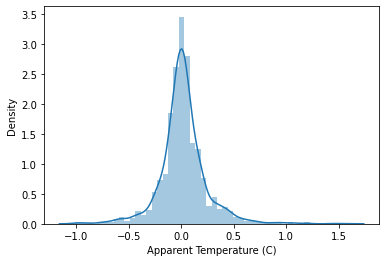

In [231]:
sns.distplot(Y_test-y_pred);

In [232]:
print('Mean absulate error', metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean absulate error 0.14684704336442908
Mean Squared Error:  0.05102206696803119
Root Mean Squared Error:  0.225880647617345


## AUTOMATING MACHINE LEARNING TASKS

## Root Mean Squared Error

In [233]:
def compML(df, alg):
    #train-test ayrimi
    y=df1.iloc[:,0]
    X=df1.iloc[:,1:]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    #modelleme
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_name = alg.__name__
    print(model_name, "Root mean_squared_error:",RMSE)

## Default Parameter

In [234]:
models = [LGBMRegressor, 
          XGBRegressor, 
          GradientBoostingRegressor, 
          RandomForestRegressor, 
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor
          ]

In [235]:
for i in models:
    compML(df, i)

LGBMRegressor Root mean_squared_error: 0.19505739017532034
XGBRegressor Root mean_squared_error: 0.19478226031760573
GradientBoostingRegressor Root mean_squared_error: 0.2314376803851861
RandomForestRegressor Root mean_squared_error: 0.17705382580086249
DecisionTreeRegressor Root mean_squared_error: 0.23534424488012776
MLPRegressor Root mean_squared_error: 0.7163771876133417
KNeighborsRegressor Root mean_squared_error: 0.5813209614074257


In [236]:
compare_model={'LGBMRegressor' : 0.19505739017532034,
               'XGBRegressor' : 0.19478226031760573,
               'GradientBoostingRegressor': 0.23199210073911275,
                'RandomForestRegressor' : 0.1766053057845471,
                'DecisionTreeRegressor' : 0.2308900742405587,
                'MLPRegressor' : 0.4352969826215471,
                'KNeighborsRegressor' : 0.5813209614074257}

In [237]:
data = pd.DataFrame(list(compare_model.items()),columns = ['Model','RMSE'])

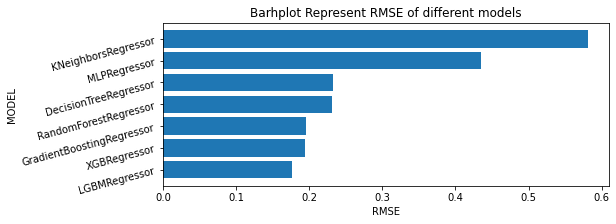

In [238]:

plt.figure(figsize=(8,3))
plt.title("Barhplot Represent RMSE of different models")
plt.xlabel("RMSE")
plt.ylabel("MODEL")
plt.barh(data['Model'], data['RMSE'].sort_values());
plt.yticks(rotation=15);

## Mean Squared Error

In [239]:
def compML(df, alg):
    #train-test ayrimi
    y=df1.iloc[:,0]
    X=df1.iloc[:,1:]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    #modelleme
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    model_name = alg.__name__
    print(model_name, " mean_squared_error:",MSE)

In [240]:
for i in models:
    compML(df, i)

LGBMRegressor  mean_squared_error: 0.03804738546200716
XGBRegressor  mean_squared_error: 0.037940128934435526
GradientBoostingRegressor  mean_squared_error: 0.05350163732654732
RandomForestRegressor  mean_squared_error: 0.03134956644374569
DecisionTreeRegressor  mean_squared_error: 0.05614676955243787
MLPRegressor  mean_squared_error: 0.3388027385277809
KNeighborsRegressor  mean_squared_error: 0.3379340601716537


In [241]:
compare_model1={'LGBMRegressor': 0.03804738546200716,
                'XGBRegressor' : 0.037940128934435526,
                'GradientBoostingRegressor'  : 0.053751757579642914,
                'RandomForestRegressor' : 0.03211437785501131,
                'DecisionTreeRegressor'  : 0.05289199593122635,
                'MLPRegressor' : 0.19771856731163373,
                'KNeighborsRegressor': 0.3379340601716537}

In [242]:
data1 = pd.DataFrame(list(compare_model1.items()),columns = ['Model','MSE'])

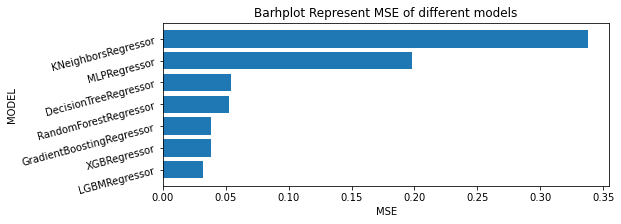

In [243]:
plt.figure(figsize=(8,3))
plt.title("Barhplot Represent MSE of different models")
plt.xlabel("MSE")
plt.ylabel("MODEL")
plt.barh(data1['Model'], data1['MSE'].sort_values());
plt.yticks(rotation=15);

## Mean absulate error

In [244]:
def compML(df, alg):
    #train-test ayrimi
    y=df1.iloc[:,0]
    X=df1.iloc[:,1:]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    #modelleme
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MAE = mean_absolute_error(y_test, y_pred)
    model_name = alg.__name__
    print(model_name, " mean_absolute_error:",MAE)

In [245]:
for i in models:
    compML(df, i)

LGBMRegressor  mean_absolute_error: 0.10157904690299224
XGBRegressor  mean_absolute_error: 0.1010806588690767
GradientBoostingRegressor  mean_absolute_error: 0.16106983210435355
RandomForestRegressor  mean_absolute_error: 0.06464537035944015
DecisionTreeRegressor  mean_absolute_error: 0.09214444437133339
MLPRegressor  mean_absolute_error: 0.33703661011649577
KNeighborsRegressor  mean_absolute_error: 0.39974148148253336


In [246]:
model_compare2={'LGBMRegressor' : 0.10157904690299224,
                'XGBRegressor'  : 0.1010806588690767,
                'GradientBoostingRegressor' : 0.16077970740850608,
               'RandomForestRegressor' : 0.06642933336335369,
                'DecisionTreeRegressor': 0.09119999996666672,
                'MLPRegressor' : 0.29264486221318003,
                'KNeighborsRegressor' : 0.39974148148253336}

In [247]:
data2 = pd.DataFrame(list(model_compare2.items()),columns = ['Model','MAE'])

In [248]:
data2

,Model,MAE
0,LGBMRegressor,0.101579
1,XGBRegressor,0.101081
2,GradientBoostingRegressor,0.160780
3,RandomForestRegressor,0.066429
4,DecisionTreeRegressor,0.091200
5,MLPRegressor,0.292645
6,KNeighborsRegressor,0.399741


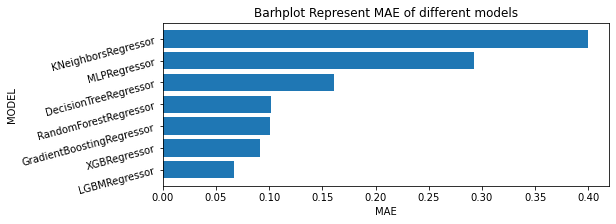

In [249]:
plt.figure(figsize=(8,3))
plt.title("Barhplot Represent MAE of different models")
plt.xlabel("MAE")
plt.ylabel("MODEL")
plt.barh(data2['Model'], data2['MAE'].sort_values());
plt.yticks(rotation=15);

In [250]:
df3 = pd.merge(data,data1,on=['Model'])
df4 = pd.merge(df3,data2, on=['Model'])
df4

,Model,RMSE,MSE,MAE
0,LGBMRegressor,0.195057,0.038047,0.101579
1,XGBRegressor,0.194782,0.037940,0.101081
2,GradientBoostingRegressor,0.231992,0.053752,0.160780
3,RandomForestRegressor,0.176605,0.032114,0.066429
4,DecisionTreeRegressor,0.230890,0.052892,0.091200
5,MLPRegressor,0.435297,0.197719,0.292645
6,KNeighborsRegressor,0.581321,0.337934,0.399741


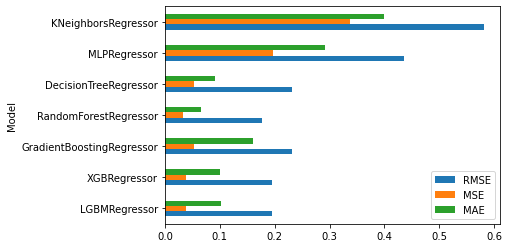

In [251]:
df4.plot(x='Model',y=['RMSE','MSE','MAE'], kind='barh');